In [9]:
# Import dependencies
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import to_categorical
from keras.models import model_from_json
import h5py
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [11]:
type(X_train)

numpy.ndarray

In [12]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


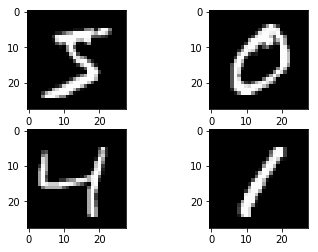

In [13]:
# Show sample figures
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# Show the plot
plt.show()

In [14]:
# Need to reshape x data
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype("float32")
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype("float32")

In [15]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [16]:
# Normalize the x data
X_train, X_test = X_train / 255.0, X_test / 255.0

In [17]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [18]:
# One Hot encoding
Y_train_oh = to_categorical(Y_train)
Y_test_oh = to_categorical(Y_test)

In [86]:
print(Y_train_oh.shape)
print(Y_test_oh.shape)

(60000, 10)
(10000, 10)


In [87]:
# Split the train set into a new train set and a dev set
X_train, X_dev, Y_train_oh, Y_dev_oh = train_test_split(
                                X_train, Y_train_oh, test_size = 5000, random_state = 23
)

In [88]:
print(X_train.shape)
print(X_dev.shape)
print(Y_train_oh.shape)
print(Y_dev_oh.shape)

(55000, 784)
(5000, 784)
(55000, 10)
(5000, 10)


In [89]:
# Data dimensions
img_size_flat = X_train.shape[1]
n_classes = Y_train_oh.shape[1]
print(img_size_flat)
print(n_classes)

784
10


In [90]:
# Define the neural network model
inputs = Input(shape=(num_pixels, ))
output_hid_1 = Dense(689, kernel_initializer='normal', activation='relu')(inputs)
output_hid_2 = Dense(689, kernel_initializer='normal', activation='relu')(output_hid_1)
predictions = Dense(n_classes, kernel_initializer='normal', activation='softmax')(output_hid_2)
model = Model(inputs=inputs, outputs=predictions)

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 689)               540865    
_________________________________________________________________
dense_11 (Dense)             (None, 689)               475410    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                6900      
Total params: 1,023,175
Trainable params: 1,023,175
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
print(model.metrics_names)

['loss', 'acc']


In [94]:
# Fit the model
History = model.fit(X_train, Y_train_oh, validation_data=(X_dev, Y_dev_oh), batch_size=128, epochs=50)
print(History.history)

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 3s 58us/step - loss: 0.2155 - acc: 0.9343 - val_loss: 0.1174 - val_acc: 0.9638
Epoch 2/50
55000/55000 [==============================] - 3s 55us/step - loss: 0.0783 - acc: 0.9754 - val_loss: 0.1011 - val_acc: 0.9690
Epoch 3/50
55000/55000 [==============================] - 3s 54us/step - loss: 0.0479 - acc: 0.9844 - val_loss: 0.1051 - val_acc: 0.9686
Epoch 4/50
55000/55000 [==============================] - 3s 54us/step - loss: 0.0321 - acc: 0.9895 - val_loss: 0.0830 - val_acc: 0.9748
Epoch 5/50
55000/55000 [==============================] - 3s 55us/step - loss: 0.0260 - acc: 0.9914 - val_loss: 0.0916 - val_acc: 0.9766
Epoch 6/50
55000/55000 [==============================] - 3s 55us/step - loss: 0.0189 - acc: 0.9936 - val_loss: 0.0788 - val_acc: 0.9766
Epoch 7/50
55000/55000 [==============================] - 3s 54us/step - loss: 0.0191 - acc: 0.9932 - val_loss: 0.0974 - val_acc:

In [95]:
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test_oh)
print(f"Test set loss: {scores[0]}")
print(f"Test set acc: {scores[1]}")

10000/10000 [==============================] - 1s 64us/step
Test set loss: 0.1299960997476727
Test set acc: 0.9824


In [96]:
# Save the model to a json file
model_json = model.to_json()
with open("model/model.json", "w") as json_file:
    json_file.write(model_json)

In [97]:
# Serialize weights to HDF5
model.save_weights("weights/weights.h5")
print("Saved weights to disk...") 

Saved weights to disk


In [3]:
"""
Later on if we want to re-use the model
"""
# Load json file and create model
json_file = open('model/model.json', 'r')
loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

In [4]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 689)               540865    
_________________________________________________________________
dense_11 (Dense)             (None, 689)               475410    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                6900      
Total params: 1,023,175
Trainable params: 1,023,175
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Load weights into loaded model
loaded_model.load_weights("weights/weights.h5")
print("Loaded weights from disk...")

Loaded weights from disk...


In [19]:
# Evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
scores = loaded_model.evaluate(X_test, Y_test_oh)
print(f"Test set loss: {scores[0]}")
print(f"Test set acc: {scores[1]}")

10000/10000 [==============================] - 1s 89us/step
Test set loss: 0.1299960997476727
Test set acc: 0.9824
